# **Projet–Fouille de Données**  <span style="color: #f17676;">**Thème : Classification des Tweets**</span>ts

<span style="color: #5dbd79;">***Emna*** ***Othmen***</span>

## <span style="color: #bd5d68;"> 1.Prétraitement des tweets</span>

In [1]:
import pandas as pd
import re
import string
# Charger le fichier CSV
df = pd.read_csv("sentiment140.csv", encoding="latin1", header=None)
df.columns = ["target", "id", "date", "flag", "user", "text"]

In [3]:
# Échantillonner 3000 tweets aléatoires
df_sample = df.sample(n=3000, random_state=42)  # random_state pour reproduire les mêmes résultats

# Réinitialiser les index après l'échantillonnage (optionnel)
df_sample = df_sample.reset_index(drop=True)

# Afficher les premières lignes du nouvel échantillon
print(df_sample.head())

   target          id                          date      flag  \
0       0  2200003196  Tue Jun 16 18:18:12 PDT 2009  NO_QUERY   
1       0  1467998485  Mon Apr 06 23:11:14 PDT 2009  NO_QUERY   
2       0  2300048954  Tue Jun 23 13:40:11 PDT 2009  NO_QUERY   
3       0  1993474027  Mon Jun 01 10:26:07 PDT 2009  NO_QUERY   
4       0  2256550904  Sat Jun 20 12:56:51 PDT 2009  NO_QUERY   

              user                                               text  
0  LaLaLindsey0609             @chrishasboobs AHHH I HOPE YOUR OK!!!   
1      sexygrneyes  @misstoriblack cool , i have no tweet apps  fo...  
2       sammydearr  @TiannaChaos i know  just family drama. its la...  
3      Lamb_Leanne  School email won't open  and I have geography ...  
4      yogicerdito                             upper airways problem   


In [5]:
print(f"Taille de l'échantillon : {len(df_sample)} tweets")


Taille de l'échantillon : 3000 tweets


In [7]:
# Fonction pour nettoyer un tweet
def clean_tweet(tweet):
    # 1. Supprimer les mentions (@username)
    tweet = re.sub(r'@\w+', '', tweet)
    
    # 2. Supprimer les hashtags (#)
    tweet = re.sub(r'#', '', tweet)
    
    # 3. Supprimer les URLs
    tweet = re.sub(r'http\S+', '', tweet)
    
    # 4. Supprimer les emojis (en utilisant un pattern pour détecter les emojis)
    tweet = re.sub(r'[^\x00-\x7F]+', '', tweet)  # Supprime les caractères non-ASCII (emojis)
    
    # 5. Supprimer la ponctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    # 6. Convertir tout le texte en minuscules
    tweet = tweet.lower()
    return tweet

# Appliquer le nettoyage sur la colonne 'text' de l'échantillon
df_sample['cleaned_text'] = df_sample['text'].apply(clean_tweet)

# Afficher quelques tweets nettoyés
print(df_sample[['text', 'cleaned_text']].head())

                                                text  \
0             @chrishasboobs AHHH I HOPE YOUR OK!!!    
1  @misstoriblack cool , i have no tweet apps  fo...   
2  @TiannaChaos i know  just family drama. its la...   
3  School email won't open  and I have geography ...   
4                             upper airways problem    

                                        cleaned_text  
0                               ahhh i hope your ok   
1          cool  i have no tweet apps  for my razr 2  
2   i know  just family drama its lamehey next ti...  
3  school email wont open  and i have geography s...  
4                             upper airways problem   


In [61]:
# Styler le tableau pour les 10 premiers tweets de l'échantillon
styled_table = (
    df_sample.head(5)
    .style.map(lambda x: 'background-color: #ffd8d8' if isinstance(x, str) else '')
)

# Afficher le tableau stylisé
styled_table

,target,id,date,flag,user,text,cleaned_text,text_length,cleaned_text_length,tokens,tokens_no_stopwords,lemmatized_tokens,stemmed_tokens,processed_text,original_length,cleaned_length,processed_length
0,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahhh i hope your ok,38,21,"['ahhh', 'i', 'hope', 'your', 'ok']","['ahhh', 'hope', 'ok']","['ahhh', 'hope', 'ok']","['ahhh', 'hope', 'ok']",ahhh hope ok,38,21,12
1,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps for my razr 2",cool i have no tweet apps for my razr 2,57,42,"['cool', 'i', 'have', 'no', 'tweet', 'apps', 'for', 'my', 'razr', '2']","['cool', 'tweet', 'apps', 'razr', '2']","['cool', 'tweet', 'apps', 'razr', '2']","['cool', 'tweet', 'app', 'razr', '2']",cool tweet app razr 2,57,42,21
2,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,"@TiannaChaos i know just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u",i know just family drama its lamehey next time u hang out with kim n u guys like have a sleepover or whatever ill call u,137,122,"['i', 'know', 'just', 'family', 'drama', 'its', 'lamehey', 'next', 'time', 'u', 'hang', 'out', 'with', 'kim', 'n', 'u', 'guys', 'like', 'have', 'a', 'sleepover', 'or', 'whatever', 'ill', 'call', 'u']","['know', 'family', 'drama', 'lamehey', 'next', 'time', 'u', 'hang', 'kim', 'n', 'u', 'guys', 'like', 'sleepover', 'whatever', 'ill', 'call', 'u']","['know', 'family', 'drama', 'lamehey', 'next', 'time', 'u', 'hang', 'kim', 'n', 'u', 'guy', 'like', 'sleepover', 'whatever', 'ill', 'call', 'u']","['know', 'famili', 'drama', 'lamehey', 'next', 'time', 'u', 'hang', 'kim', 'n', 'u', 'guy', 'like', 'sleepov', 'whatev', 'ill', 'call', 'u']",know famili drama lamehey next time u hang kim n u guy like sleepov whatev ill call u,137,122,85
3,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography stuff on there to revise! *Stupid School* :'(,school email wont open and i have geography stuff on there to revise stupid school,91,84,"['school', 'email', 'wont', 'open', 'and', 'i', 'have', 'geography', 'stuff', 'on', 'there', 'to', 'revise', 'stupid', 'school']","['school', 'email', 'wont', 'open', 'geography', 'stuff', 'revise', 'stupid', 'school']","['school', 'email', 'wont', 'open', 'geography', 'stuff', 'revise', 'stupid', 'school']","['school', 'email', 'wont', 'open', 'geographi', 'stuff', 'revis', 'stupid', 'school']",school email wont open geographi stuff revis stupid school,91,84,58
4,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,upper airways problem,22,22,"['upper', 'airways', 'problem']","['upper', 'airways', 'problem']","['upper', 'airway', 'problem']","['upper', 'airway', 'problem']",upper airway problem,22,22,20


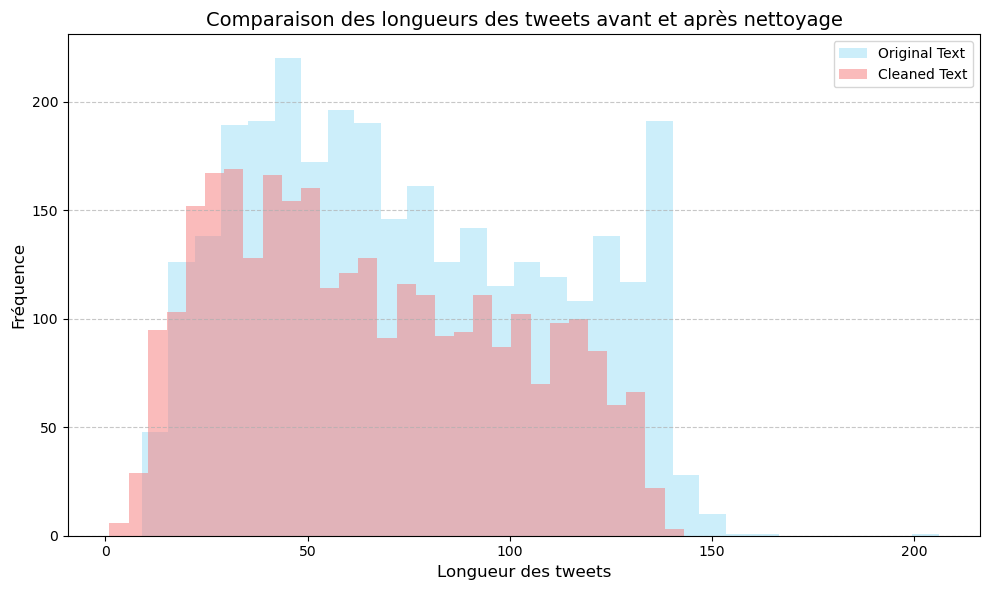

In [57]:
import matplotlib.pyplot as plt

# Ajouter des colonnes pour les longueurs des tweets avant et après nettoyage
df_sample['text_length'] = df_sample['text'].apply(len)
df_sample['cleaned_text_length'] = df_sample['cleaned_text'].apply(len)

# Créer l'histogramme
plt.figure(figsize=(10, 6))

# Histogramme pour la longueur des tweets originaux
plt.hist(df_sample['text_length'], bins=30, alpha=0.5, label='Original Text', color='#9adef6')

# Histogramme pour la longueur des tweets nettoyés
plt.hist(df_sample['cleaned_text_length'], bins=30, alpha=0.5, label='Cleaned Text', color='#f67979')

# Ajouter des légendes et titres
plt.title('Comparaison des longueurs des tweets avant et après nettoyage', fontsize=14)
plt.xlabel('Longueur des tweets', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.tight_layout()
plt.show()


## <span style="color: #bd5d68;">2.Analyse NLP avec NLTK</span>

In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
# Télécharger les ressources nécessaires
nltk.download('punkt')  # Pour la tokenisation
nltk.download('stopwords')  # Pour les stopwords
nltk.download('wordnet')  # Pour la lemmatisation
# Initialiser le stemmer et la liste des stopwords
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_tweet(tweet):
    # Tokenisation
    tokens = word_tokenize(tweet)
    
    # Suppression des stopwords
    tokens_no_stopwords = [word for word in tokens if word.lower() not in stop_words]
    
    # Stemming
    stemmed_tokens = [stemmer.stem(word) for word in tokens_no_stopwords]
    
    # Rejoindre les tokens traités en une seule chaîne
    return ' '.join(stemmed_tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Client\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Client\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Client\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 1.Tokenisation (Découper le texte en mots):
La tokenisation consiste à découper le texte en mots individuels ou en tokens.

In [23]:
# Exemple de tokenisation
df_sample['tokens'] = df_sample['cleaned_text'].apply(word_tokenize)


### 2.Suppression des stopwords : 
On filtre les mots courants comme "the", "is", "and" qui n'apportent pas d’information utile pour l’analyse.

In [25]:
# Charger la liste des stopwords anglais
stop_words = set(stopwords.words('english'))

# Supprimer les stopwords
df_sample['tokens_no_stopwords'] = df_sample['tokens'].apply(
    lambda tokens: [word for word in tokens if word not in stop_words]
)


### 3.Lemmatisation :
Réduction des mots à leur forme canonique (ex. "better" → "good").

In [27]:
# Initialiser le lemmatizer
lemmatizer = WordNetLemmatizer()

# Appliquer la lemmatisation
df_sample['lemmatized_tokens'] = df_sample['tokens_no_stopwords'].apply(
    lambda tokens: [lemmatizer.lemmatize(word) for word in tokens]
)


### 4.Stemming : 
Chaque mot est réduit à sa racine (ex. "running" → "run").

In [33]:
# Initialiser le stemmer (PorterStemmer est souvent utilisé)
stemmer = PorterStemmer()

# Appliquer le stemming sur les tokens
df_sample['stemmed_tokens'] = df_sample['tokens_no_stopwords'].apply(
    lambda tokens: [stemmer.stem(word) for word in tokens]
)


In [43]:
# Appliquer le prétraitement à chaque tweet nettoyé
df_sample['processed_text'] = df_sample['cleaned_text'].apply(preprocess_tweet)

# Afficher les 5 premiers tweets avant et après prétraitement
print(df_sample[['text', 'cleaned_text', 'processed_text']].head())


                                                text  \
0             @chrishasboobs AHHH I HOPE YOUR OK!!!    
1  @misstoriblack cool , i have no tweet apps  fo...   
2  @TiannaChaos i know  just family drama. its la...   
3  School email won't open  and I have geography ...   
4                             upper airways problem    

                                        cleaned_text  \
0                               ahhh i hope your ok    
1          cool  i have no tweet apps  for my razr 2   
2   i know  just family drama its lamehey next ti...   
3  school email wont open  and i have geography s...   
4                             upper airways problem    

                                      processed_text  
0                                       ahhh hope ok  
1                              cool tweet app razr 2  
2  know famili drama lamehey next time u hang kim...  
3  school email wont open geographi stuff revis s...  
4                               upper airway proble

##### Displaying the Data in a Table(original tweet, cleaned tweet, and processed tweet)

In [53]:
import IPython.display as display
from IPython.core.display import HTML

def display_colored_tweets(df):
    html = "<table style='width:100%; border-collapse: collapse;'>"
    html += "<tr><th style='text-align:left;'>Tweet Original</th><th style='text-align:left;'>Tweet Nettoyé</th><th style='text-align:left;'>Tweet Prétraité</th></tr>"
    
    for index, row in df.iterrows():
        original_tweet = f"<td style='background-color: #f69aa8; padding: 8px;'>{row['text']}</td>"
        cleaned_tweet = f"<td style='background-color: #bbf69a; padding: 8px;'>{row['cleaned_text']}</td>"
        processed_tweet = f"<td style='background-color: #9adef6; padding: 8px;'>{row['processed_text']}</td>"
        html += f"<tr>{original_tweet}{cleaned_tweet}{processed_tweet}</tr>"
    
    html += "</table>"
    display.display(HTML(html))

# Afficher les 5 premiers tweets après nettoyage et prétraitement
display_colored_tweets(df_sample.head())


Tweet Original,Tweet Nettoyé,Tweet Prétraité
@chrishasboobs AHHH I HOPE YOUR OK!!!,ahhh i hope your ok,ahhh hope ok
"@misstoriblack cool , i have no tweet apps for my razr 2",cool i have no tweet apps for my razr 2,cool tweet app razr 2
"@TiannaChaos i know just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u",i know just family drama its lamehey next time u hang out with kim n u guys like have a sleepover or whatever ill call u,know famili drama lamehey next time u hang kim n u guy like sleepov whatev ill call u
School email won't open and I have geography stuff on there to revise! *Stupid School* :'(,school email wont open and i have geography stuff on there to revise stupid school,school email wont open geographi stuff revis stupid school
upper airways problem,upper airways problem,upper airway problem


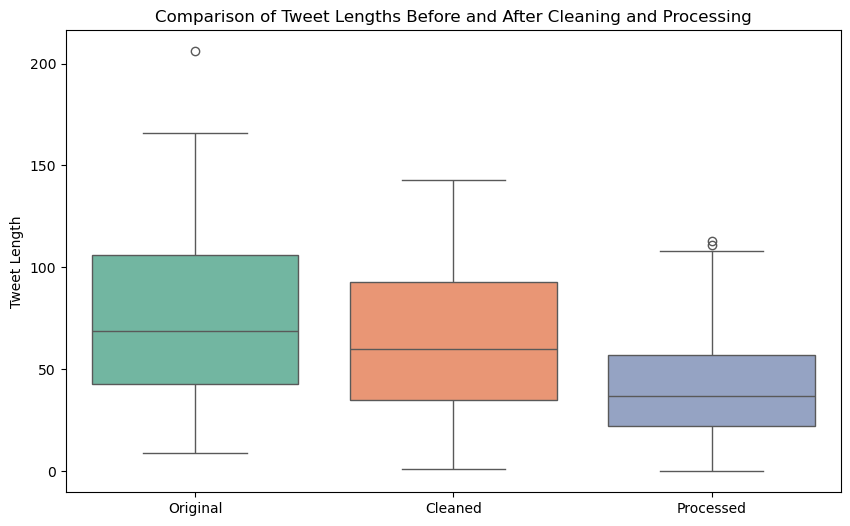

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer la longueur des tweets
df_sample['original_length'] = df_sample['text'].apply(len)
df_sample['cleaned_length'] = df_sample['cleaned_text'].apply(len)
df_sample['processed_length'] = df_sample['processed_text'].apply(len)

# Créer un DataFrame pour stocker les longueurs
length_df = pd.DataFrame({
    'Original': df_sample['original_length'],
    'Cleaned': df_sample['cleaned_length'],
    'Processed': df_sample['processed_length']
})

# Tracer le box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=length_df, palette="Set2")
plt.title('Comparison of Tweet Lengths Before and After Cleaning and Processing')
plt.ylabel('Tweet Length')
plt.show()


## <span style="color: #bd5d68;"> 3.Classification des tweets </span>

## Calcul de la Distance de Jaccard
### mesure la similarité entre deux ensembles
d(tweet1​,tweet2​)=∣tweet1​∩tweet2​∣/∣tweet1​∪tweet2​∣​

Cela peut être appliqué en transformant les tweets en ensembles de mots, puis en calculant l’intersection et l’union de ces ensembles.

### Étape 1: Préparation des données (TF-IDF Vectorization)

In [67]:
def jaccard_similarity(tweet1, tweet2):
    # Convertir les tweets en ensembles de mots
    set1 = set(tweet1.split())
    set2 = set(tweet2.split())
    
    # Calculer l'intersection et l'union des ensembles
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    
    # Retourner la distance de Jaccard
    return intersection / union if union != 0 else 0

# Exemple d'utilisation de la fonction sur deux tweets
tweet1 = df_sample['processed_text'].iloc[100]
tweet2 = df_sample['processed_text'].iloc[5]
similarity = jaccard_similarity(tweet1, tweet2)
print(f"Jaccard similarity between tweet1 and tweet2: {similarity}")


Jaccard similarity between tweet1 and tweet2: 0.0


In [69]:
# Afficher les tweets traités pour vérifier leur contenu
print(f"Tweet 1: {tweet1}")
print(f"Tweet 2: {tweet2}")


Tweet 1: oh ive got case design someon idiot stole prove want play hardballim game
Tweet 2: go miss pastor sermon faith


In [87]:
def jaccard_similarity(tweet1, tweet2):
    # Convertir les tweets en ensembles de mots
    set1 = set(tweet1.split())
    set2 = set(tweet2.split())
    
    # Afficher les ensembles de mots pour débogage
    print(f"Set 1: {set1}")
    print(f"Set 2: {set2}")
    
    # Calculer l'intersection et l'union des ensembles
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    
    # Retourner la distance de Jaccard
    return intersection / union if union != 0 else 0

# Exemple d'utilisation de la fonction sur deux tweets
tweet1 = df_sample['processed_text'].iloc[500]
tweet2 = df_sample['processed_text'].iloc[7]

# Afficher les tweets avant d'appeler la fonction
print(f"Tweet 1: {tweet1}")
print(f"Tweet 2: {tweet2}")

similarity = jaccard_similarity(tweet1, tweet2)
print(f"Jaccard similarity between tweet1 and tweet2: {similarity}")


Tweet 1: hate us
Tweet 2: oh feel like
Set 1: {'us', 'hate'}
Set 2: {'like', 'feel', 'oh'}
Jaccard similarity between tweet1 and tweet2: 0.0


Pour utiliser la distance de Jaccard dans un algorithme de K-Means, vous devrez d'abord personnaliser l'algorithme, car K-Means utilise normalement la distance euclidienne pour les calculs de proximité. Vous pouvez remplacer cette distance euclidienne par la distance de Jaccard pour obtenir un clustering basé sur cette mesure.

                                      processed_text  kmeans_cluster_k2  \
0                                       ahhh hope ok                  0   
1                              cool tweet app razr 2                  0   
2  know famili drama lamehey next time u hang kim...                  0   
3  school email wont open geographi stuff revis s...                  0   
4                               upper airway problem                  0   

   kmeans_cluster_k3  kmeans_cluster_k4  
0                  0                  0  
1                  0                  0  
2                  1                  1  
3                  0                  0  
4                  0                  0  


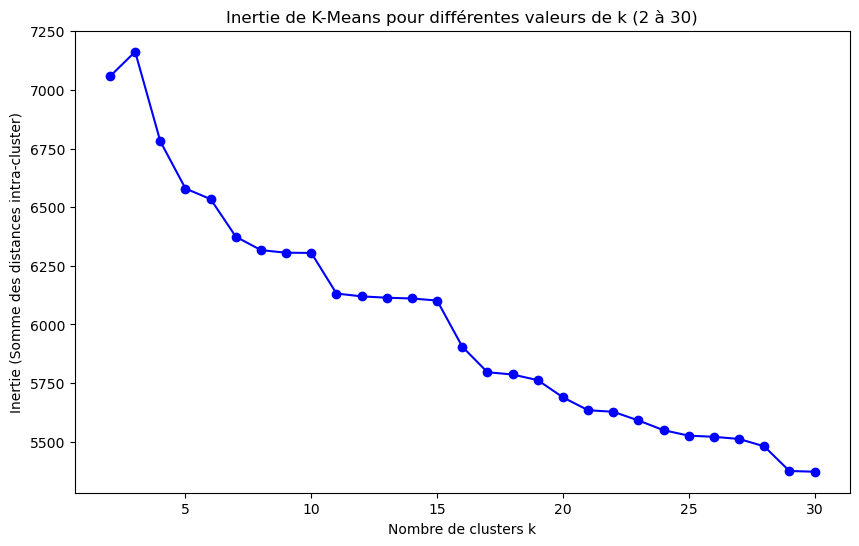

In [143]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour calculer la distance de Jaccard entre deux ensembles de mots
def jaccard_distance(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return 1 - intersection / union if union != 0 else 1

# Convertir les tweets traités en ensembles de mots
sets_of_words = [set(tweet.split()) for tweet in df_sample['processed_text']]

# Calculer la matrice de distance de Jaccard (matrice carrée de distances entre chaque paire de tweets)
distance_matrix = np.array([[jaccard_distance(set1, set2) for set2 in sets_of_words] for set1 in sets_of_words])

# Appliquer K-Means pour différentes valeurs de k (2 à 30)
inertia_values = []  # Liste pour stocker les inerties (pour évaluer la performance du clustering)

for k in range(2, 31):  # Tester pour k de 2 à 30
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Utiliser la matrice de distance comme entrée pour KMeans (appliquer un KMeans personnalisé avec la distance de Jaccard)
    kmeans.fit(distance_matrix)
    
    # Ajouter les labels de clusters au DataFrame
    df_sample[f'kmeans_cluster_k{k}'] = kmeans.labels_
    
    # Enregistrer l'inertie (la somme des distances intra-cluster)
    inertia_values.append(kmeans.inertia_)

# Afficher les résultats du clustering K-Means pour les 3 premiers clusters (k=2)
print(df_sample[['processed_text', 'kmeans_cluster_k2', 'kmeans_cluster_k3', 'kmeans_cluster_k4']].head())

# Visualiser l'inertie pour différentes valeurs de k (choisir un bon k)
plt.figure(figsize=(10, 6))
plt.plot(range(2, 31), inertia_values, marker='o', color='b')
plt.title('Inertie de K-Means pour différentes valeurs de k (2 à 30)')
plt.xlabel('Nombre de clusters k')
plt.ylabel('Inertie (Somme des distances intra-cluster)')
plt.show()



l'inertie (distance intra-cluster).

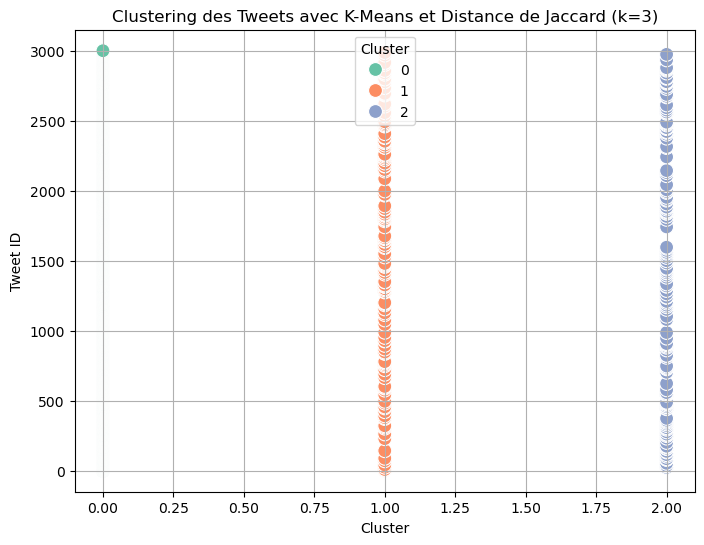

In [105]:
# Optionnel : Visualisation des résultats pour k=3
plt.figure(figsize=(8, 6))

# Utiliser 'id' pour l'axe des y et 'kmeans_cluster_k3' pour les clusters
sns.scatterplot(data=df_sample, x='kmeans_cluster_k3', y=df_sample.index, hue='kmeans_cluster_k3', palette="Set2", s=100)

# Ajouter des éléments de personnalisation du graphique
plt.title('Clustering des Tweets avec K-Means et Distance de Jaccard (k=3)')
plt.xlabel('Cluster')
plt.ylabel('Tweet ID')  # Utilisation de 'ID' pour l'axe des y
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


## Afin de visualiser les clusters générés, nous allons réduire la dimensionnalité à 2D en utilisant PCA(Principal Component Analysis) et afficher un graphique de dispersion.*
permet de projeter des données à haute dimension dans un espace à deux dimensions, facilitant ainsi la visualisation et l'interprétation des clusters tout en conservant la variance maximale des données.

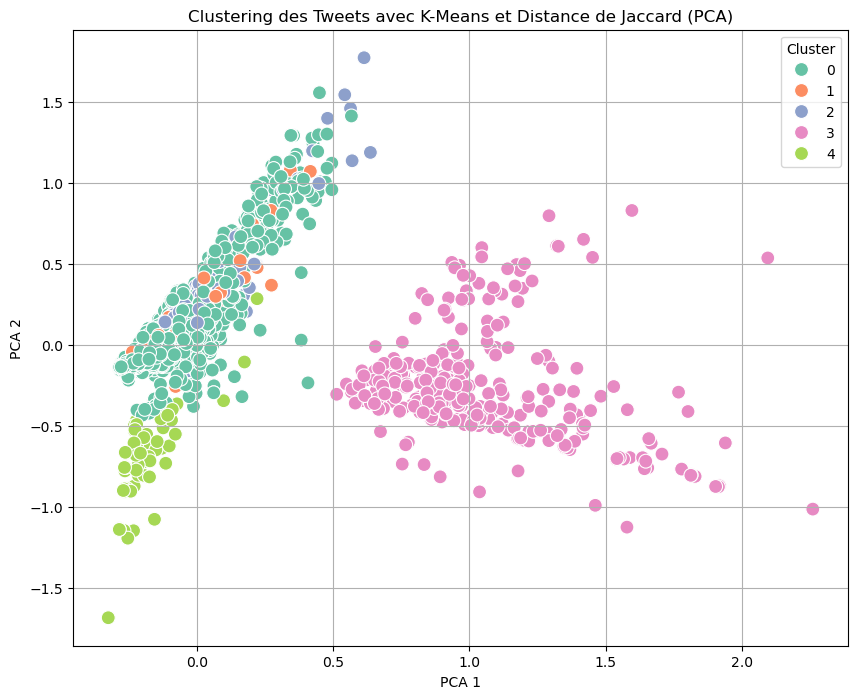

In [141]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(distance_matrix)
# Ajouter les labels de clusters au DataFrame
df_sample['kmeans_cluster'] = kmeans.labels_

# Réduire la dimensionnalité avec PCA pour la visualisation
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(distance_matrix)

# Visualisation avec PCA pour la réduction des dimensions
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_vectors[:, 0], y=reduced_vectors[:, 1], hue=df_sample['kmeans_cluster'], palette="Set2", s=100)
plt.title('Clustering des Tweets avec K-Means et Distance de Jaccard (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)

### Étape 2: Appliquer Fuzzy C-Means Clustering


In [115]:
pip install fuzzy-c-means


Note: you may need to restart the kernel to use updated packages.


In [131]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances
from fcmeans import FCM  # Bibliothèque Fuzzy C-Means
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour calculer la distance de Jaccard entre deux ensembles de mots
def jaccard_distance(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return 1 - intersection / union if union != 0 else 1

# Convertir les tweets traités en ensembles de mots
sets_of_words = [set(tweet.split()) for tweet in df_sample['processed_text']]

# Calculer la matrice de distance de Jaccard (matrice carrée de distances entre chaque paire de tweets)
distance_matrix = np.array([[jaccard_distance(set1, set2) for set2 in sets_of_words] for set1 in sets_of_words])

# Appliquer Fuzzy C-Means avec la matrice de distance
fcm = FCM(n_clusters=3)  # Vous pouvez ajuster le nombre de clusters ici

# Nous devons fournir une matrice de distance, alors nous utilisons la matrice de distance de Jaccard calculée
fcm.fit(distance_matrix)

# Obtenir les étiquettes de cluster (appartenance floue aux clusters)
labels_fcm = fcm.predict(distance_matrix)

# Ajouter les labels de clusters au DataFrame
df_sample['fcm_cluster'] = labels_fcm  # Pas besoin de `argmax`

# Afficher les résultats du clustering Fuzzy C-Means pour les premiers clusters
print(df_sample[['processed_text', 'fcm_cluster']].head())




                                      processed_text  fcm_cluster
0                                       ahhh hope ok            1
1                              cool tweet app razr 2            1
2  know famili drama lamehey next time u hang kim...            2
3  school email wont open geographi stuff revis s...            1
4                               upper airway problem            1


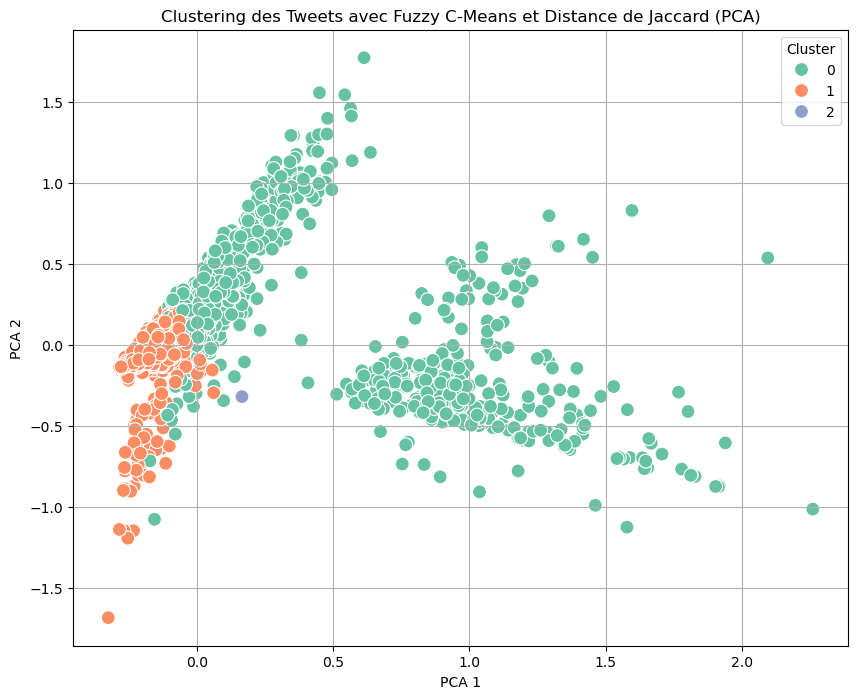

In [121]:
# Réduire la dimensionnalité avec PCA pour la visualisation
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(distance_matrix)

# Visualisation avec PCA pour la réduction des dimensions
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_vectors[:, 0], y=reduced_vectors[:, 1], hue=df_sample['fcm_cluster'], palette="Set2", s=100)
plt.title('Clustering des Tweets avec Fuzzy C-Means et Distance de Jaccard (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

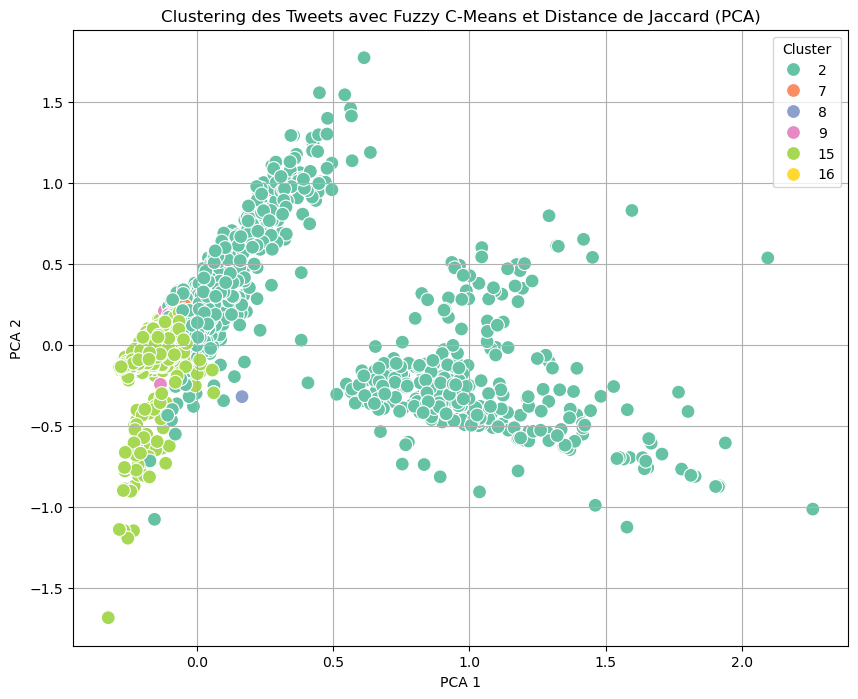

In [129]:
# Appliquer Fuzzy C-Means avec la matrice de distance
fcm = FCM(n_clusters=19)  # Ajustez le nombre de clusters ici
fcm.fit(distance_matrix)

# Prédiction des labels de cluster (appartenance floue aux clusters)
labels_fcm = fcm.predict(distance_matrix)

# Si les labels sont 2D, utilisez argmax pour obtenir l'indice du cluster le plus probable
if len(labels_fcm.shape) > 1:
    df_sample['fcm_cluster'] = labels_fcm.argmax(axis=1)
else:
    # Si labels_fcm est 1D, affectez-le directement
    df_sample['fcm_cluster'] = labels_fcm

# Réduire la dimensionnalité avec PCA pour la visualisation
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(distance_matrix)

# Visualisation avec PCA pour la réduction des dimensions
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_vectors[:, 0], y=reduced_vectors[:, 1], hue=df_sample['fcm_cluster'], palette="Set2", s=100)
plt.title('Clustering des Tweets avec Fuzzy C-Means et Distance de Jaccard (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### c'est  inutile  dajouter des clusters (3 c'est suffisant )

In [158]:
# Nouvelle fonctionnalité : Trouver les tweets les plus représentatifs pour chaque cluster
def get_representative_tweets(df, labels, sets_of_words):
    representative_tweets = {}
    for cluster in range(len(set(labels))):
        # Trouver les indices des tweets appartenant à ce cluster
        cluster_indices = np.where(labels == cluster)[0]
        
        # Calculer la similarité de chaque tweet avec les autres tweets du même cluster
        similarities = []
        for idx in cluster_indices:
            tweet_set = sets_of_words[idx]
            # Calculer la distance moyenne de Jaccard entre ce tweet et les autres tweets du même cluster
            distances = [jaccard_distance(tweet_set, sets_of_words[other_idx]) for other_idx in cluster_indices]
            avg_distance = np.mean(distances)
            similarities.append(avg_distance)
        
        # Sélectionner le tweet avec la plus petite distance moyenne (le plus représentatif)
        representative_index = cluster_indices[np.argmin(similarities)]
        representative_tweets[cluster] = representative_index
    
    return representative_tweets

# Obtenir les labels de K-Means pour k=2 (par exemple)
labels_kmeans = df_sample['kmeans_cluster_k5'].values  # Choisissez ici le k que vous voulez analyser

# Obtenir les indices des tweets les plus représentatifs pour chaque cluster
representative_tweets_kmeans = get_representative_tweets(df_sample, labels_kmeans, sets_of_words)

# Afficher les tweets les plus représentatifs
print("Tweets représentatifs pour K-Means :")
for cluster, index in representative_tweets_kmeans.items():
    print(f"Cluster {cluster}: {df_sample.iloc[index]['processed_text']}")

Tweets représentatifs pour K-Means :
Cluster 0: lol tara well love still cross bear cross go good one
Cluster 1: oh feel like
Cluster 2: work today
Cluster 3: im sorri
Cluster 4: thank


In [174]:
# Choisissez le nombre de clusters (k) que vous voulez
k = 3  # Exemple de choix du nombre de clusters

# Appliquer Fuzzy C-Means avec la matrice de distance
fcm = FCM(n_clusters=k)  # Vous pouvez ajuster le nombre de clusters ici

# Nous devons fournir une matrice de distance, alors nous utilisons la matrice de distance de Jaccard calculée
fcm.fit(distance_matrix)

# Obtenir les probabilités d'appartenance floue pour chaque tweet à chaque cluster (u)
u = fcm.u  # Ces valeurs représentent les probabilités d'appartenance des tweets à chaque cluster

# Nouvelle fonctionnalité : Trouver les tweets les plus représentatifs pour chaque cluster
def get_representative_tweets_fuzzy(u, data_subset, k):
    representative_tweets = {}
    
    # Pour chaque cluster
    for cluster in range(k):
        # Trouver l'index du tweet avec la probabilité maximale pour ce cluster
        closest_index = np.argmax(u[cluster])  # Le tweet avec la probabilité maximale d'appartenance à ce cluster
        representative_tweets[cluster] = closest_index
        
    return representative_tweets

# Obtenir les indices des tweets les plus représentatifs pour chaque cluster
representative_tweets_fuzzy = get_representative_tweets_fuzzy(u, df_sample, k)

# Afficher les tweets les plus représentatifs
print("\nTweets représentatifs pour Fuzzy C-Means :")
for cluster, index in representative_tweets_fuzzy.items():
    print(f"Cluster {cluster}: {df_sample.iloc[index]['processed_text']}")


Tweets représentatifs pour Fuzzy C-Means :
Cluster 0: know famili drama lamehey next time u hang kim n u guy like sleepov whatev ill call u
Cluster 1: know famili drama lamehey next time u hang kim n u guy like sleepov whatev ill call u
Cluster 2: ahhh hope ok


In [179]:
# Choisissez le nombre de clusters (k) que vous voulez
k = 5  # Exemple de choix du nombre de clusters

# Appliquer Fuzzy C-Means avec la matrice de distance
fcm = FCM(n_clusters=k)  # Vous pouvez ajuster le nombre de clusters ici

# Nous devons fournir une matrice de distance, alors nous utilisons la matrice de distance de Jaccard calculée
fcm.fit(distance_matrix)

# Obtenir les probabilités d'appartenance floue pour chaque tweet à chaque cluster (u)
u = fcm.u  # Ces valeurs représentent les probabilités d'appartenance des tweets à chaque cluster

# Nouvelle fonctionnalité : Trouver les tweets les plus représentatifs pour chaque cluster
def get_representative_tweets_fuzzy(u, data_subset, k):
    representative_tweets = {}
    
    # Pour chaque cluster
    for cluster in range(k):
        # Trouver l'index du tweet avec la probabilité maximale pour ce cluster
        closest_index = np.argmax(u[cluster])  # Le tweet avec la probabilité maximale d'appartenance à ce cluster
        representative_tweets[cluster] = closest_index
        
    return representative_tweets

# Obtenir les indices des tweets les plus représentatifs pour chaque cluster
representative_tweets_fuzzy = get_representative_tweets_fuzzy(u, df_sample, k)

# Afficher les tweets les plus représentatifs
print("\nTweets représentatifs pour Fuzzy C-Means :")
for cluster, index in representative_tweets_fuzzy.items():
    print(f"Cluster {cluster}: {df_sample.iloc[index]['processed_text']}")


Tweets représentatifs pour Fuzzy C-Means :
Cluster 0: ahhh hope ok
Cluster 1: ahhh hope ok
Cluster 2: school email wont open geographi stuff revis stupid school
Cluster 3: ahhh hope ok
Cluster 4: ahhh hope ok
